In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import os
import numpy as np

In [2]:
datapath1='C:\MiniProject\chestxray-images'
dataset_path='C:\MiniProject\dataset'

In [3]:
categories=os.listdir(dataset_path)
print(categories)

['Covid-19', 'Normal', 'Pneumonia']


In [4]:
df = pd.read_csv('C:\MiniProject\chestxray-images\metadata.csv')
df['label'].value_counts()

Normal             10192
Lung_Opacity        6012
COVID               3616
Viral Pneumonia     1345
Name: label, dtype: int64

In [5]:
df.head()

,Unnamed: 0,file_name,image_data_grayscale,file_format,image_shape,label
0,0,COVID-1.png,[[185 40 0 ... 0 24 131]\n [ 75 14 0 ...,PNG,"(299, 299)",COVID
1,1,COVID-10.png,[[135 133 131 ... 24 21 19]\n [132 130 129 ...,PNG,"(299, 299)",COVID
2,2,COVID-100.png,[[ 62 10 0 ... 197 200 209]\n [ 35 6 0 ...,PNG,"(299, 299)",COVID
3,3,COVID-1000.png,[[162 162 162 ... 4 4 5]\n [ 26 26 26 ...,PNG,"(299, 299)",COVID
4,4,COVID-1001.png,[[ 0 0 0 ... 0 0 0]\n [ 0 0 0 ...,PNG,"(299, 299)",COVID


In [6]:
dataset=pd.read_csv(os.path.join(datapath1,'metadata.csv'))
file_name=dataset['file_name']
label=dataset['label']
dataset = np.array(dataset.drop(['image_data_grayscale','file_format','image_shape'], axis = 1))
print(dataset)
print("\nNumber of rows of in the DataFrame: ")
length = len(dataset)
print(length)

[[0 'COVID-1.png' 'COVID']
 [1 'COVID-10.png' 'COVID']
 [2 'COVID-100.png' 'COVID']
 ...
 [21162 'Viral Pneumonia-997.png' 'Viral Pneumonia']
 [21163 'Viral Pneumonia-998.png' 'Viral Pneumonia']
 [21164 'Viral Pneumonia-999.png' 'Viral Pneumonia']]

Number of rows of in the DataFrame: 
21165


In [7]:
covid_index=np.where(label=='COVID')[0]
print("Number of COVID-19 cases in the DataFrame: ")
print(len(covid_index))
print("\n")
covid_images=file_name[covid_index]
print(covid_images)

Number of COVID-19 cases in the DataFrame: 
3616


0          COVID-1.png
1         COVID-10.png
2        COVID-100.png
3       COVID-1000.png
4       COVID-1001.png
             ...      
3611     COVID-995.png
3612     COVID-996.png
3613     COVID-997.png
3614     COVID-998.png
3615     COVID-999.png
Name: file_name, Length: 3616, dtype: object


In [8]:
import cv2

for covid_image in covid_images:
    image=cv2.imread(os.path.join(datapath1,'C:\MiniProject\chestxray-images\COVID-19_Radiography_Dataset\COVID',covid_image))
    try:
        cv2.imwrite(os.path.join(dataset_path,categories[0],covid_image),image)
    except Exception as e:
        print(e)

In [9]:
normal_index=np.where(label=='Normal')[0]
print("Number of Normal cases in the DataFrame: ")
print(len(normal_index))
print("\n")
normal_images=file_name[normal_index]
print(normal_images)

Number of Normal cases in the DataFrame: 
10192


9628         Normal-1.png
9629        Normal-10.png
9630       Normal-100.png
9631      Normal-1000.png
9632     Normal-10000.png
               ...       
19815     Normal-9995.png
19816     Normal-9996.png
19817     Normal-9997.png
19818     Normal-9998.png
19819     Normal-9999.png
Name: file_name, Length: 10192, dtype: object


In [10]:
for normal_image in normal_images:
    image=cv2.imread(os.path.join(datapath1,r'C:\MiniProject\chestxray-images\COVID-19_Radiography_Dataset\Normal',normal_image))
    try:
        cv2.imwrite(os.path.join(dataset_path,categories[1],normal_image),image)
    except Exception as e:
        print(e)

In [11]:
pneumonia_index=np.where(label=='Viral Pneumonia')[0]
print("Number of Pneumonia cases in the DataFrame: ")
print(len(pneumonia_index))
print("\n")
pneumonia_images=file_name[pneumonia_index]
print(pneumonia_images)

Number of Pneumonia cases in the DataFrame: 
1345


19820       Viral Pneumonia-1.png
19821      Viral Pneumonia-10.png
19822     Viral Pneumonia-100.png
19823    Viral Pneumonia-1000.png
19824    Viral Pneumonia-1001.png
                   ...           
21160     Viral Pneumonia-995.png
21161     Viral Pneumonia-996.png
21162     Viral Pneumonia-997.png
21163     Viral Pneumonia-998.png
21164     Viral Pneumonia-999.png
Name: file_name, Length: 1345, dtype: object


In [12]:
for pneumonia_image in pneumonia_images:
    image=cv2.imread(os.path.join(datapath1,'C:\MiniProject\chestxray-images\COVID-19_Radiography_Dataset\Viral Pneumonia',pneumonia_image))
    try:
        cv2.imwrite(os.path.join(dataset_path,categories[2],pneumonia_image),image)
    except Exception as e:
        print(e)

In [13]:
#Preprocessing

import cv2,os

data_path='C:\MiniProject\dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))  #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'Covid-19': 0, 'Normal': 1, 'Pneumonia': 2}
['Covid-19', 'Normal', 'Pneumonia']
[0, 1, 2]


In [14]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
    
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            #Covering the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #Resizing the gray scale into 100x100, since we need a fixed common size for all images in the  datset
            data.append(resized)
            target.append(label_dict[category])
            #Appending the image and the label(categorized) into the list(dataset)
            
        except Exception as e:
            print('Exception:',e)
            #If any exception raised, the exception will be printed here. And pass to the next image

In [15]:
#Normalize the images

import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
#print(data)

target=np.array(target)
#print(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)
print(new_target)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [16]:
#Saves the file in the zipped format 

np.save('data',data)
np.save('target',new_target)

In [17]:
#Training

import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [18]:
#Neural Network Architecture, Keras API
#TensorFlow is the backend

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, Activation, MaxPooling2D
from keras.utils import normalize
from keras.layers import Concatenate
from keras import Input
from keras.callbacks import ModelCheckpoint

input_shape=data.shape[1:] #50,50,1
inp=Input(shape=input_shape)
convs=[]

parallel_kernels=[3,5,7]

for k in range(len(parallel_kernels)):
    
    conv=Conv2D(128, parallel_kernels[k],activation='relu',input_shape=input_shape,strides=1)(inp)
    convs.append(conv)

model = Sequential()
#model.add(conv_model)
model.add(Input(shape=(100,100,1)))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

#Extra convolution layers 
model.add(Conv2D(128,(5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,input_dim=128,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 64)        640       
                                                                 
 activation (Activation)     (None, 98, 98, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 45, 45, 128)       204928    
                                                                 
 activation_1 (Activation)   (None, 45, 45, 128)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 128)      0         
 2D)                                                    

In [19]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [20]:
print(train_data.shape)

(13637, 100, 100, 1)


In [21]:
print(data.shape)

(15153, 100, 100, 1)


In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint
#from pyexpat import model

checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=5,callbacks=[checkpoint],validation_split=0.1)

Epoch 1/5
384/384 [==============================] - ETA: 0s - loss: 0.5689 - accuracy: 0.7507

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


384/384 [==============================] - 285s 739ms/step - loss: 0.5689 - accuracy: 0.7507 - val_loss: 0.3423 - val_accuracy: 0.8592
Epoch 2/5
384/384 [==============================] - ETA: 0s - loss: 0.3555 - accuracy: 0.8573

INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


384/384 [==============================] - 285s 742ms/step - loss: 0.3555 - accuracy: 0.8573 - val_loss: 0.2855 - val_accuracy: 0.9047
Epoch 3/5
384/384 [==============================] - ETA: 0s - loss: 0.2871 - accuracy: 0.8911

INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


384/384 [==============================] - 281s 732ms/step - loss: 0.2871 - accuracy: 0.8911 - val_loss: 0.2303 - val_accuracy: 0.9194
Epoch 4/5
384/384 [==============================] - ETA: 0s - loss: 0.2392 - accuracy: 0.9131

INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


384/384 [==============================] - 284s 739ms/step - loss: 0.2392 - accuracy: 0.9131 - val_loss: 0.1928 - val_accuracy: 0.9318
Epoch 5/5
384/384 [==============================] - ETA: 0s - loss: 0.2008 - accuracy: 0.9260

INFO:tensorflow:Assets written to: model-005.model\assets


INFO:tensorflow:Assets written to: model-005.model\assets


384/384 [==============================] - 283s 736ms/step - loss: 0.2008 - accuracy: 0.9260 - val_loss: 0.1885 - val_accuracy: 0.9333


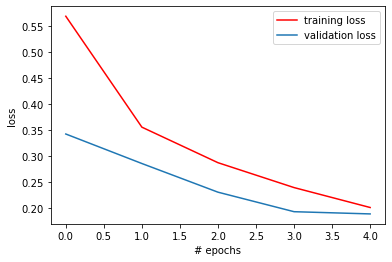

In [23]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

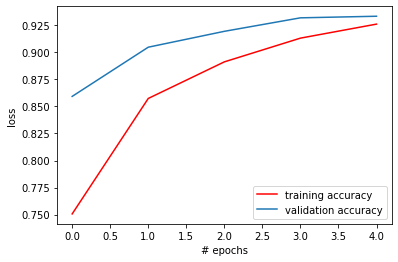

In [24]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [25]:
print(model.evaluate(test_data,test_target))

48/48 [==============================] - 9s 188ms/step - loss: 0.2006 - accuracy: 0.9202
[0.2006186693906784, 0.9201846718788147]


In [26]:
model.save('xyz.hdf5')

In [27]:
from tensorflow import keras
model = keras.models.load_model('xyz.hdf5')

(1, 100, 100, 1)

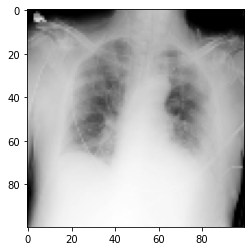

In [28]:
import keras
import tensorflow as tf

path = "C:\\MiniProject\\dataset\\Covid-19\\COVID-1.png"

img = keras.utils.load_img(path, target_size=(input_shape))
#img = image.load_img(path, target_size=(input_shape))

img = keras.utils.img_to_array(img)/255
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#Covering the image into gray scale
resized=cv2.resize(gray,(img_size,img_size))
img=np.reshape(gray,(img_size,img_size,1))
plt.imshow(img, cmap='gray')
img = np.array([img])
img.shape

In [34]:
model.predict(img)

1/1 [==============================] - 0s 55ms/step


array([[9.938719e-01, 6.058649e-03, 6.939005e-05]], dtype=float32)

In [29]:
prediction = model.predict(test_data)

48/48 [==============================] - 9s 176ms/step


In [35]:
prediction

array([[1.0389937e-03, 9.9896097e-01, 3.1951870e-08],
       [2.6600373e-01, 7.3370713e-01, 2.8904594e-04],
       [3.3341307e-04, 1.0332522e-03, 9.9863333e-01],
       ...,
       [1.8819253e-06, 9.9999809e-01, 1.5562667e-14],
       [3.3053599e-05, 9.9966705e-01, 2.9993829e-04],
       [3.4377411e-01, 6.2732552e-03, 6.4995259e-01]], dtype=float32)

In [36]:
classes = ['Covid','Normal','Pneumonia']
all_pred = np.ndarray(shape = (test_data.shape[0], 3), dtype = np.float32)
for i in range(0,test_data.shape[0]):
    for j in range(0,3):
        if prediction[i][j] ==max(prediction[i]):
            all_pred[i][j] = 1
        else:
            all_pred[i][j] = 0
all_pred

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [37]:
predicted_labels = [""]*test_data.shape[0]
for i in range(0, test_data.shape[0]):
    for j in range(0,3):
        if all_pred[i][j] == 1:
            predicted_labels[i] = classes[j]
predicted_labels

['Normal',
 'Normal',
 'Pneumonia',
 'Covid',
 'Pneumonia',
 'Covid',
 'Covid',
 'Pneumonia',
 'Covid',
 'Normal',
 'Normal',
 'Normal',
 'Covid',
 'Normal',
 'Pneumonia',
 'Covid',
 'Normal',
 'Normal',
 'Pneumonia',
 'Covid',
 'Pneumonia',
 'Covid',
 'Normal',
 'Normal',
 'Pneumonia',
 'Normal',
 'Covid',
 'Normal',
 'Normal',
 'Covid',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Covid',
 'Covid',
 'Normal',
 'Pneumonia',
 'Normal',
 'Pneumonia',
 'Normal',
 'Normal',
 'Covid',
 'Covid',
 'Pneumonia',
 'Covid',
 'Normal',
 'Covid',
 'Normal',
 'Normal',
 'Pneumonia',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Covid',
 'Normal',
 'Normal',
 'Pneumonia',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Covid',
 'Covid',
 'Normal',
 'Covid',
 'Normal',
 'Normal',
 'Normal',
 'Covid',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Covid',
 'Pneumonia',
 'Covid',
 'Covid',
 'Normal',
 'Normal',
 'Normal',
 'Covid',
 'Normal',
 'Covid',
 'Normal

In [38]:
test_labels = [""]*test_data.shape[0]
for i in range(0, test_data.shape[0]):
    for j in range(0,3):
        if test_target[i][j] == 1:
            test_labels[i] = classes[j]
test_labels

['Normal',
 'Normal',
 'Pneumonia',
 'Covid',
 'Pneumonia',
 'Normal',
 'Covid',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Pneumonia',
 'Normal',
 'Pneumonia',
 'Normal',
 'Normal',
 'Normal',
 'Pneumonia',
 'Covid',
 'Normal',
 'Covid',
 'Normal',
 'Normal',
 'Pneumonia',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Covid',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Covid',
 'Normal',
 'Normal',
 'Pneumonia',
 'Normal',
 'Pneumonia',
 'Normal',
 'Normal',
 'Covid',
 'Covid',
 'Normal',
 'Covid',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Pneumonia',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Covid',
 'Normal',
 'Normal',
 'Pneumonia',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Covid',
 'Normal',
 'Normal',
 'Covid',
 'Normal',
 'Normal',
 'Normal',
 'Covid',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Covid',
 'Normal',
 'Covid',
 'Covid',
 'Normal',
 'Normal',
 'Normal',
 'Covid',
 'Normal',
 'Covid',
 'Normal'

In [39]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
#We use Support Vector classifier as a classifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
print(train_data.shape)

(13637, 100, 100, 1)


In [40]:
test_target

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [41]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(test_labels, predicted_labels, classes)

In [42]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['COVID','Normal','Viral Pneumonia'], 
                     columns = ['COVID','Normal','Viral Pneumonia'])

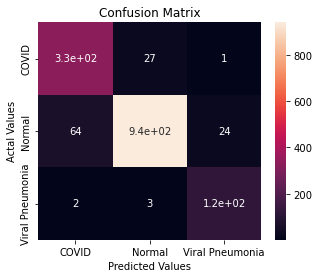

In [43]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [44]:
from sklearn import metrics
print(metrics.confusion_matrix(test_labels, predicted_labels, labels=["Covid","Normal","Pneumonia"]))
print(metrics.classification_report(test_labels, predicted_labels, labels=["Covid","Normal","Pneumonia"]))

[[334  27   1]
 [ 64 940  24]
 [  2   3 121]]
              precision    recall  f1-score   support

       Covid       0.83      0.92      0.88       362
      Normal       0.97      0.91      0.94      1028
   Pneumonia       0.83      0.96      0.89       126

    accuracy                           0.92      1516
   macro avg       0.88      0.93      0.90      1516
weighted avg       0.93      0.92      0.92      1516

